# Linear Regression

Linear regression is a simple method used to find the best straight line that describes the relationship between a dependent variable (the one you're trying to predict) and one or more independent variables (the ones you're using to make the prediction). It works by finding the line that minimizes the sum of the squared differences between the actual values and the values predicted by the line. This line can then be used to predict the dependent variable for new values of the independent variables.

## Python Implementation of Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
np.random.seed(42)

X = np.random.rand(50, 1) * 100

Y = 3.5 * X + np.random.randn(50, 1) * 20

print(X.shape)
print(Y.shape)

(50, 1)
(50, 1)


In [ ]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [ ]:
Y_pred = model.predict(X)

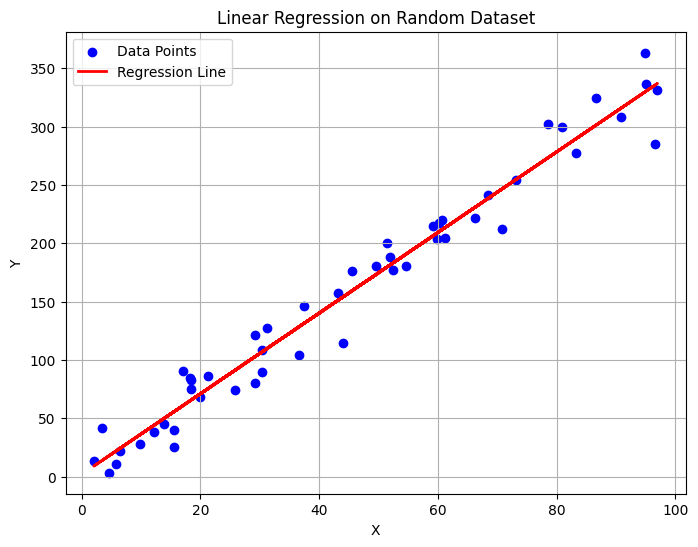

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Random Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Slope (Coefficient):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

##Explaination

This code is a classic example of generating a **synthetic dataset** for a linear regression problem. It creates a set of points that follow a general straight-line trend but includes some "noise" to make it look like real-world data.

Here is the breakdown of each line:

### 1. `np.random.seed(42)`

This line ensures **reproducibility**.

* Computers generate "pseudo-random" numbers based on a starting point called a seed.
* By setting the seed to `42` (or any integer), you ensure that every time you run this code, you get the **exact same random numbers**. This is helpful for debugging or sharing results with others.

### 2. `X = np.random.rand(50, 1) * 100`

This creates your **input feature** (the independent variable).

* `np.random.rand(50, 1)`: Generates a 50x1 column vector of random numbers between **0 and 1**.
* `* 100`: Scales those numbers so they fall between **0 and 100**.
* **Result:** 50 data points representing something like "Square Footage" or "Hours Studied."

### 3. `Y = 3.5 * X + np.random.randn(50, 1) * 20`

This creates your **target variable** (the label) using a linear equation: .

* **`3.5 * X`**: This is the "true" underlying relationship. For every 1 unit increase in ,  should increase by 3.5.
* **`np.random.randn(50, 1) * 20`**: This adds **Gaussian (Normal) noise**.
* `randn` generates numbers centered around 0.
* `* 20` increases the "spread" of that noise.
* Without this part, all your data points would fall perfectly on a straight line. With it, they are scattered around the line, mimicking real measurements.



---

### What the resulting data looks like

If you were to plot this, you would see a clear upward-sloping trend, but the points would be "fuzzy" rather than a perfect line.

| Component | Role in Linear Equation | Value in Code |
| --- | --- | --- |
| **Slope** |  | `3.5` |
| **Input** |  | `X` (0 to 100) |
| **Noise/Error** |  | `randn * 20` |

**Would you like me to show you the Matplotlib code to visualize this dataset?**

# Polynomial Regression

We'll using Pandas, NumPy, Matplotlib and Sckit-Learn libraries and a random dataset for the analysis of Polynomial Regression.

Download dataset here: https://media.geeksforgeeks.org/wp-content/uploads/data.csv

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/data.csv'
datas = pd.read_csv(url)
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


Our feature variable that is X will contain the Column between 1st and the target variable that is y will contain the 2nd column.

In [ ]:
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

print(X.shape)

(6, 1)


In [ ]:
lin = LinearRegression()

lin.fit(X, y)

LinearRegression()

Now we will apply polynomial regression by adding polynomial terms to the feature space. In this example, we use a polynomial of degree 4.

In [ ]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

print(X_poly.shape)

(6, 5)


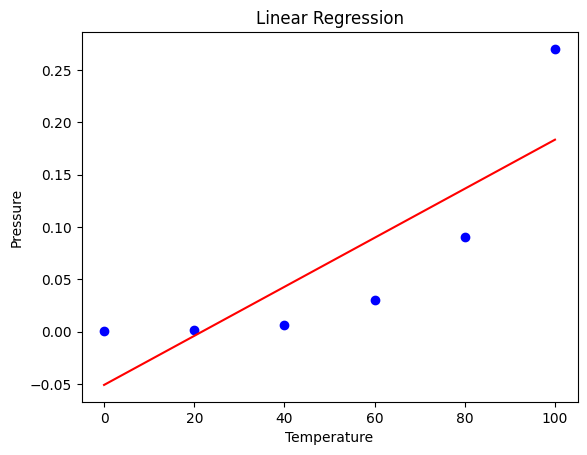

In [ ]:
#Visualize the results of the linear regression model by plotting the data points and the regression line.
plt.scatter(X, y, color='blue')

plt.plot(X, lin.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

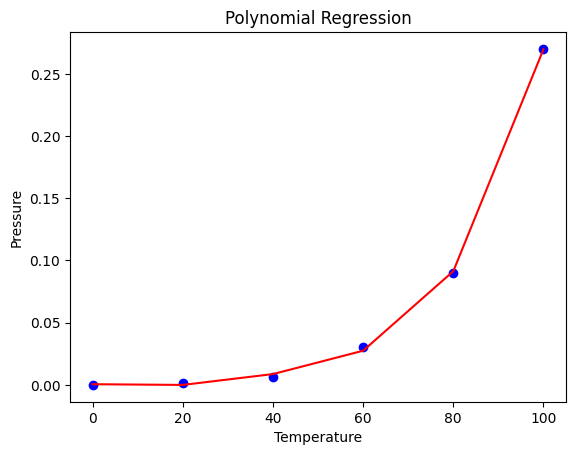

In [ ]:
#Now visualize the polynomial regression results by plotting the data points and the polynomial curve.
plt.scatter(X, y, color='blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

To predict new values using both linear and polynomial regression we need to ensure the input variable is in a 2D array format.

In [ ]:
pred = 100
predarray = np.array([[pred]])
lin.predict(predarray)

array([0.18333333])

In [ ]:
pred2 = 100
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

array([0.26973889])

# Ridge Regression
Ridge Regression is a linear regression technique that adds a penalty to the size of the coefficients. This penalty, known as L2 regularization, shrinks the coefficient values towards zero. By adding this constraint, Ridge Regression aims to reduce the model's complexity and prevent overfitting, especially when dealing with datasets that have high multicollinearity (where predictor variables are highly correlated).

Let's implement it and here we will import numpy and scikit learn.

* StandardScaler: Ensures all features are on the same scale so the ridge penalty affects them fairly.

* alpha (λ) in Ridge Regression: Controls the strength of regularization hence larger values shrink coefficients more aggressively.

* Train-test split: Divides data into training and testing sets to evaluate generalization performance.

* Ridge(alpha=1.0): Initializes a Ridge Regression model with a chosen regularization parameter.

* ridge.fit(): Fits the model to training data and estimates the coefficients under L2 penalty.

* ridge.predict(): Uses the trained model to generate predictions on unseen test data.

* mean_squared_error(): Measures the average squared difference between predicted and actual values; lower is better.

* GridSearchCV: Systematically tests multiple alpha values to find the one that minimizes error using cross-validation.

* best_estimator_: The model with the optimal alpha found through GridSearchCV.

* coef_: The final learned coefficients after applying L2 shrinkage.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(0)
X = np.random.randn(200, 6)
true_coef = np.array([3.2, -1.5, 0.7, 0, 2.8, -0.5])
y = X.dot(true_coef) + np.random.randn(200) * 0.6

"""
X: This is your feature matrix (the independent variables).
true_coef: These are the "true" weights or coefficients for each feature.
.dot(): This performs dot product/matrix multiplication. If X has multiple columns, this calculates a weighted sum for every row, effectively creating the "true" output before noise is added.
"""

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

#Instead of using X for the values in the splitting part, we used X_scaled

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
pred_basic = ridge.predict(X_test)

print("MSE (alpha = 1.0):", mean_squared_error(y_test, pred_basic))
print("Coefficients (alpha = 1.0):", ridge.coef_)
param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 500]}

grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)
best_ridge = grid.best_estimator_
pred_best = best_ridge.predict(X_test)

print("Best alpha selected:", grid.best_params_["alpha"])
print("MSE (best alpha):", mean_squared_error(y_test, pred_best))
print("Coefficients (best alpha):", best_ridge.coef_)

MSE (alpha = 1.0): 0.45980230236924924
Coefficients (alpha = 1.0): [ 2.96587537 -1.64397225  0.66532484  0.06289239  2.83625348 -0.46900939]
Best alpha selected: 0.001
MSE (best alpha): 0.45099557660691597
Coefficients (best alpha): [ 2.9849965  -1.65395975  0.67045849  0.06557375  2.85454007 -0.47306529]


#Elastic Net Regularization

Elastic Net is a regularization technique that combines the penalties of both L1 (Lasso) and L2 (Ridge) regularization methods. It aims to improve model performance by addressing limitations of each individual method, particularly in situations where there are many correlated features. By using a linear combination of L1 and L2 penalties, Elastic Net can perform feature selection (like Lasso) and handle multicollinearity (like Ridge) simultaneously.

##Implementation of Elastic Net Regression From Scratch

Step 1: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Step 2: Build the Elastic Net Regression Class

* init: Initializes learning rate, iterations and penalty strengths.

* fit: Initializes weights, learns via gradient descent.
* update_weights: Computes gradients, applies L1 and L2 penalties, updates parameters.
* predict: Returns predictions from input features.

In [ ]:
class ElasticRegression:
    def __init__(self, learning_rate, iterations, l1_penalty, l2_penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = np.zeros(self.n)
        for j in range(self.n):
            l1_grad = self.l1_penalty if self.W[j] > 0 else -self.l1_penalty
            dW[j] = (
                -2 * (self.X[:, j]).dot(self.Y - Y_pred) +  l1_grad + 2 * self.l2_penalty * self.W[j]
            ) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db
        return self

    def predict(self, X):
        return X.dot(self.W) + self.b

Code Breakdown

 `__init__` (Hyperparameters)

* `learning_rate`: How big of a "step" the model takes during optimization.
* `iterations`: How many times the model looks at the data to update its weights.
* `l1_penalty`: Controls the strength of the Lasso part (absolute value of weights).
* `l2_penalty`: Controls the strength of the Ridge part (squared value of weights).

`fit` and `update_weights` (The Optimization)

The `fit` method initializes the weights ($W$) and bias ($b$) to zero, then enters a loop to update them using the **Gradient Descent** formula.

Inside `update_weights`, the code calculates the **Gradient (dW)**. This is the "direction" the weights need to move to reduce the error. The formula used here is:

$$dW = \frac{1}{m} \left( -2X^T(Y - Y_{pred}) + \text{L1\_grad} + 2 \cdot L2 \cdot W \right)$$

* **`l1_grad`**: This is derived from the absolute value. Since the derivative of $|W|$ is $1$ (if $W > 0$) or $-1$ (if $W < 0$),, the code uses an `if/else` check to determine the sign.
* **`2 * self.l2_penalty * self.W[j]`**: This is the derivative of the squared weights  ($W^2$)..

`predict`

This is the standard linear equation: $Y = X \cdot W + b$. . It takes your features and the learned weights to give you a final prediction.

Why use this instead of just Linear Regression?

If you have 100 features but only 10 are actually important, a standard linear regression might give small weights to all 100. **Elastic Net** will use the L1 penalty to zero out the 90 useless ones and the L2 penalty to ensure the 10 useful ones are stable and reliable.

Step 3: Data Preparation
* The CSV file is loaded. To download the used dataset, click here.
* Features and target variables are separated.
* Data is split into training and test sets.

In [ ]:
url = "https://media.geeksforgeeks.org/wp-content/uploads/20250802120600878900/salary_data.csv"

df = pd.read_csv(url)
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=1 / 3, random_state=0)

df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Step 4: Model Initialization and Training
* The Elastic Net Regression model is created with specified parameters.
* The model is trained on the training data.

In [ ]:
model = ElasticRegression(
    iterations=1000,
    learning_rate=0.01,
    l1_penalty=500,
    l2_penalty=1
)
model.fit(X_train, Y_train)

Step 5: Prediction and Evaluation
* Predictions are made for the test set.
* The first few predicted and actual salary values and the model parameters, are printed for inspection.

In [ ]:
Y_pred = model.predict(X_test)
print("Predicted values ", np.round(Y_pred[:3], 2))
print("Real values      ", Y_test[:3])
print("Trained W        ", round(model.W[0], 2))
print("Trained b        ", round(model.b, 2))

Predicted values  [ 40837.61 122887.43  65079.6 ]
Real values       [ 37731 122391  57081]
Trained W         9323.84
Trained b         26851.84


* These lines print the first three results to give you a "gut check" of accuracy.

* np.round(..., 2): Rounds the predictions to two decimal places for readability.

* Goal: You want the predicted values to be as close to the real values as possible. If the predictions are $10.5$ and the real value is $10.2$, your model is doing well.

Step 6: Visualization

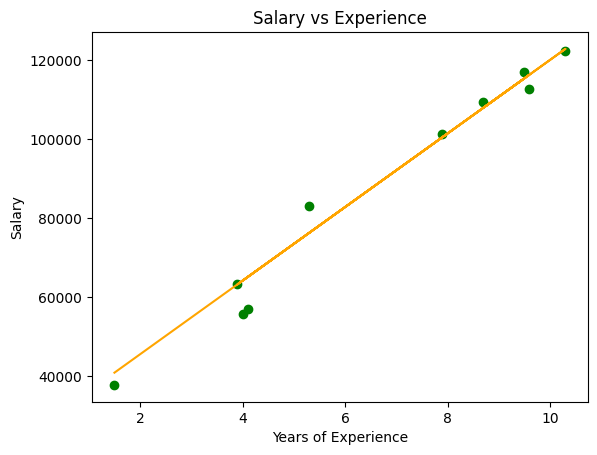

In [ ]:
plt.scatter(X_test, Y_test, color="green")
plt.plot(X_test, Y_pred, color="orange")
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()